Found 139 .tif files in the directory ../data/training.
Image mode: I;16B
Image mode: I;16B
Image mode: I;16B
Image mode: I;16B
Image mode: I;16B


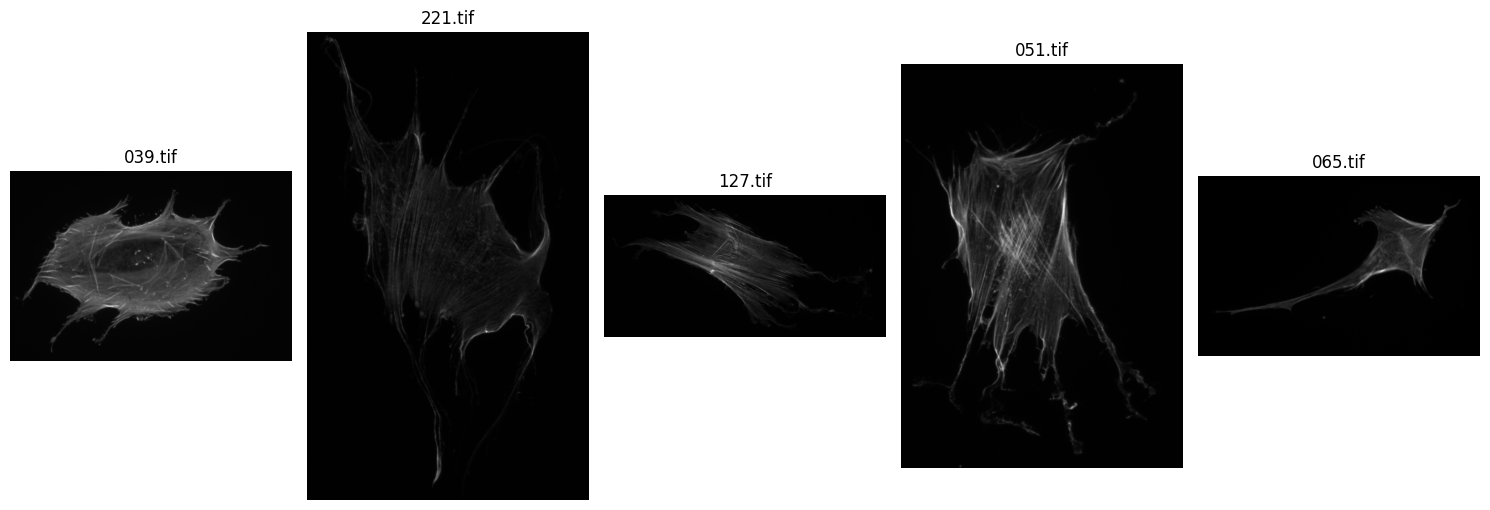

In [10]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Set the path to your training folder
data_dir = "../data/training"

# Check if the directory exists
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"The directory {data_dir} does not exist.")

# Get a list of all .tif files in the training directory
tif_files = [f for f in os.listdir(data_dir) if f.endswith('.tif')]

# Print a message if no .tif files are found
if not tif_files:
    print(f"No .tif files found in the directory {data_dir}.")
else:
    print(f"Found {len(tif_files)} .tif files in the directory {data_dir}.")

# Determine the number of images to display (maximum of 5 for layout clarity)
num_images = min(5, len(tif_files))

# Initialize a figure for displaying images
fig, axes = plt.subplots(1, num_images, figsize=(15, 5)) if num_images > 1 else (plt.subplots(figsize=(5, 5))[1],)

# Process each .tif file (limiting to the first few if many images)
for idx, tif_file in enumerate(tif_files[:num_images]):
    # Open the image
    file_path = os.path.join(data_dir, tif_file)
    image = Image.open(file_path)
    
    # Print image mode to understand its format (e.g., "I;16" for 16-bit grayscale)
    print(f"Image mode: {image.mode}")
    
    # Convert the image to a NumPy array for handling in matplotlib
    image_array = np.array(image)
    
    # Plot the image in the subplot
    ax = axes[idx] if num_images > 1 else axes
    
    # If the image is in 16-bit mode, set the vmin and vmax to its actual range
    if image_array.dtype == np.uint16:
        ax.imshow(image_array, cmap='gray', vmin=0, vmax=65535)  # 16-bit grayscale range
    else:
        ax.imshow(image_array, cmap='gray')  # Default handling for other types
    
    # Set title and remove axis for clean visualization
    ax.set_title(tif_file)
    ax.axis('off')

# Adjust layout to avoid overlap and show all images
plt.tight_layout()
plt.show()
